/home/eric/.local/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


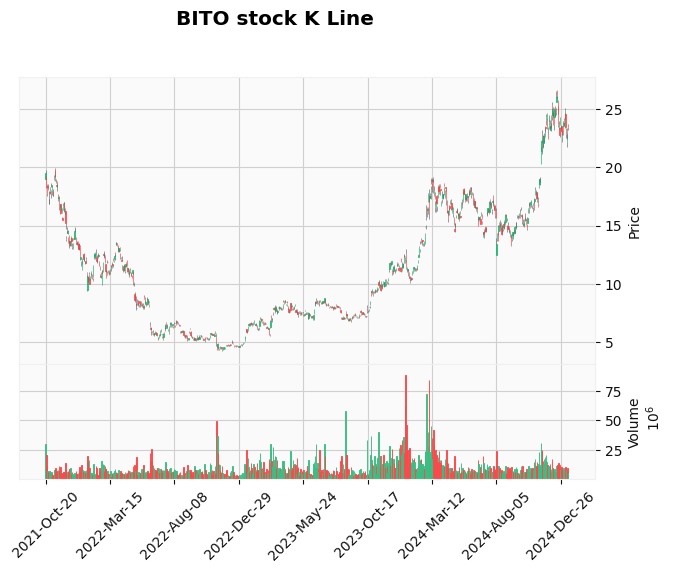

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# 读取数据
data = pd.read_csv('/home/eric/Desktop/code/BTC_data_analyzation/datas/BITO_stock_data.csv')

data['Date'] = pd.to_datetime(data['Date'], utc=True)

data['Open'] = pd.to_numeric(data['Open'])
data['High'] = pd.to_numeric(data['High'])
data['Low'] = pd.to_numeric(data['Low'])
data['Close'] = pd.to_numeric(data['Close'])
data['Volume'] = pd.to_numeric(data['Volume'])
data.set_index('Date', inplace=True)

# 绘制K线图
mpf.plot(data, type='candle', title='BITO stock K Line', ylabel='Price', ylabel_lower='Volume', volume=True, style='yahoo')
